In [60]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt

##### BUSINESS PROBLEM-1

In [61]:
loansdata = pd.read_csv('LoansData.csv')
loansdata

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [62]:
loansdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

##### Using lending club loans data, the team would like to test below hypothesis on how different factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)

##### a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)

In [63]:
loansdata['Interest.Rate']  =  loansdata['Interest.Rate'].str.replace('%','')

In [64]:
loansdata['Interest.Rate'] = loansdata['Interest.Rate'].astype('float')
loansdata['Interest.Rate']

0        8.90
1       12.12
2       21.98
3        9.99
4       11.71
        ...  
2495    16.77
2496    14.09
2497    13.99
2498    12.42
2499    13.79
Name: Interest.Rate, Length: 2500, dtype: float64

In [65]:
#EDA - Exploratory Data Analysis
loansdata['Interest.Rate'].fillna(loansdata['Interest.Rate'].mean(),inplace=True)
loansdata['Amount.Requested'].fillna(loansdata['Amount.Requested'].mean(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_13368\215244746.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loansdata['Amount.Requested'].fillna(loansdata['Amount.Requested'].mean(),inplace=True)


In [66]:
#H0--->Intrest rate is not varied for different loan amounts (Less interest not charged for high loan amounts)
#H1--->Intrest rate is varied for different loan amounts (Less interest charged for high loan amounts)

In [67]:
# Taking Confidence Interval at 95%, and p-value 0.05
###### Finding the  relation between these two continous variables using Pearson test

In [68]:
pearson_corr, p_value = stats.pearsonr(loansdata['Interest.Rate'], loansdata['Amount.Requested'])

In [69]:
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.3324464059665682
P-value: 1.4148683739785434e-65


In [70]:
 # I got p-value smaller than 0.05 that means with 95% confidence, I will reject the null hypothesis
# Conclusion 
#Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts).
print("Conclusion :")
print("Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)")

Conclusion :
Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)


##### b. Loan length is directly effecting intrest rate

In [71]:
loan_len_36  = loansdata.loc[loansdata['Loan.Length']=='36 months', 'Interest.Rate' ]
loan_len_60  = loansdata.loc[loansdata['Loan.Length']=='60 months', 'Interest.Rate' ]

In [72]:
#The t-test is a statistical test used to determine if there is a significant difference between the means of two groups.
#it compares the interest rates between two different loan lengths (36 months vs. 60 months), which are two distinct groups.

In [73]:
#H0-->Loan length is not directly effecting intrest rate
#H1-->Loan length is directly effecting intrest rate

In [74]:
from scipy.stats import ttest_ind
stats.ttest_ind(loan_len_36,loan_len_60)

TtestResult(statistic=-23.41049023613487, pvalue=9.549596064332559e-110, df=2498.0)

In [75]:
# Insights
    # I got p-value smaller than 0.05 that means with 95% confidence, I will Reject the null hypothesis

In [76]:
print("Conclusion :")
print("Loan length is directly effecting intrest rate.")

Conclusion :
Loan length is directly effecting intrest rate.


##### 3. Interest rate varies for different purpose of loans

In [77]:
loansdata

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [78]:
interest_rate_by_purpose=[]
loan_purposes = loansdata['Loan.Purpose'].unique()

for purpose in loan_purposes:
    interest_rate_by_purpose.append(loansdata.loc[loansdata['Loan.Purpose']==purpose,'Interest.Rate'])
    


In [79]:
stats.f_oneway(*interest_rate_by_purpose)

F_onewayResult(statistic=7.4826387840974355, pvalue=1.1599665535989115e-14)

In [80]:
# Interpreting the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are statistically significant differences in interest rates between the different purposes of loans.")
else:
    print("Fail to reject the null hypothesis. There are no statistically significant differences in interest rates between the different purposes of loans.")

Reject the null hypothesis. There are statistically significant differences in interest rates between the different purposes of loans.


##### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [81]:
loansdata['FICO.Range'].isna().sum()

2

In [82]:
loansdata['Home.Ownership'].isna().sum()

1

In [83]:
loansdata['FICO.Range'].describe()

count        2498
unique         38
top       670-674
freq          171
Name: FICO.Range, dtype: object

In [84]:
loansdata['Home.Ownership'].describe()

count         2499
unique           5
top       MORTGAGE
freq          1147
Name: Home.Ownership, dtype: object

In [85]:
# As show in the description, most occured value is (670-674), so replacing missing values with this range
loansdata['FICO.Range'].fillna('670-674', inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_13368\345504037.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loansdata['FICO.Range'].fillna('670-674', inplace=True)


In [86]:
loansdata['Home.Ownership'].fillna('MORTGAGE', inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_13368\2608792386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loansdata['Home.Ownership'].fillna('MORTGAGE', inplace=True)


In [87]:
#H0----> There is no relationship between FICO scores and Home Ownership
    
#H1-----> There is relationship between FICO scores and Home Ownership.

In [88]:
loansdata.head(10)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
5,6000.0,6000.0,15.31,36 months,other,20.05%,CT,OWN,4891.67,670-674,17.0,10391.0,2.0,3 years
6,10000.0,10000.0,7.90,36 months,debt_consolidation,26.09%,MA,RENT,2916.67,720-724,10.0,15957.0,0.0,10+ years
7,33500.0,33450.0,17.14,60 months,credit_card,14.70%,LA,MORTGAGE,13863.42,705-709,12.0,27874.0,0.0,10+ years
8,14675.0,14675.0,14.33,36 months,credit_card,26.92%,CA,RENT,3150.00,685-689,9.0,7246.0,1.0,8 years
9,7000.0,7000.0,6.91,36 months,credit_card,7.10%,CA,RENT,5000.00,715-719,8.0,7612.0,0.0,3 years


In [89]:
contingency_table = pd.crosstab(loansdata['Home.Ownership'], loansdata['FICO.Range'])
contingency_table

FICO.Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home.Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,68,79,55,61,...,21,12,15,7,7,6,5,6,0,1
NONE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,17,18,13,11,9,10,...,3,2,1,1,3,2,1,0,1,0
RENT,4,2,0,3,67,75,91,75,91,65,...,4,5,4,5,2,3,2,0,0,0


In [90]:
stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=473.5648028168521, pvalue=1.0065160858471904e-35, dof=148, expected_freq=array([[2.29600e+00, 1.37760e+00, 4.59200e-01, 1.83680e+00, 5.74000e+01,
        6.65840e+01, 7.94416e+01, 7.62272e+01, 7.20944e+01, 6.24512e+01,
        6.42880e+01, 7.02576e+01, 6.01552e+01, 6.15328e+01, 5.14304e+01,
        4.27056e+01, 5.23488e+01, 4.31648e+01, 4.31648e+01, 2.98480e+01,
        2.43376e+01, 2.47968e+01, 2.80112e+01, 2.11232e+01, 2.11232e+01,
        1.65312e+01, 7.80640e+00, 1.01024e+01, 1.28576e+01, 8.72480e+00,
        9.18400e+00, 5.96960e+00, 5.96960e+00, 5.05120e+00, 3.67360e+00,
        2.75520e+00, 4.59200e-01, 4.59200e-01],
       [2.00000e-03, 1.20000e-03, 4.00000e-04, 1.60000e-03, 5.00000e-02,
        5.80000e-02, 6.92000e-02, 6.64000e-02, 6.28000e-02, 5.44000e-02,
        5.60000e-02, 6.12000e-02, 5.24000e-02, 5.36000e-02, 4.48000e-02,
        3.72000e-02, 4.56000e-02, 3.76000e-02, 3.76000e-02, 2.60000e-02,
        2.12000e-02, 2.16000e-02, 2.44000e-0

In [91]:
# Insight
    # I got p-value smaller than 0.05 that means with 95% confidence, I will reject the null hypothesis

In [92]:
# Conclusion
    #There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.
print("Conclusion: ")
print("There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.")

Conclusion: 
There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.


##### BUSINESS PROBLEM - 2

In [93]:
pricequote = pd.read_csv('Price_Quotes.csv')
pricequote

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


##### BUSINESS PROBLEM: We would like to assess if there is any difference in the average price quotes provided by Mary and Barry

In [94]:
pricequote.describe()

,Order_Number,Barry_Price,Mary_Price
count,12.000000,12.000000,12.000000
mean,6.500000,124.333333,114.750000
std,3.605551,20.698412,11.054616
min,1.000000,94.000000,97.000000
25%,3.750000,106.750000,107.000000
50%,6.500000,131.000000,114.000000
75%,9.250000,140.500000,121.000000
max,12.000000,152.000000,133.000000


In [95]:
pricequote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [96]:
#H0--->No difference in the average price quotes provided by Mary and Barry
#H1--->There is difference in the average price quotes provided by Mary and Barry

In [97]:
stats.ttest_rel(pricequote['Barry_Price'],pricequote['Mary_Price'])

TtestResult(statistic=2.5213765108923494, pvalue=0.02840588045242053, df=11)

In [98]:
#p-value is less than 0.05, so we can reject the null hypothesis with 95% confidence
print('Yes.There is difference in the average price quotes provided by Mary and Barry')

Yes.There is difference in the average price quotes provided by Mary and Barry


##### BUSINESS PROBLEM-3:

#####  Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Isthere evidence that the critical incidence rate improved?

In [99]:
treatment_facility = pd.read_csv('Treatment_Facility.csv')
treatment_facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [100]:
treatment_facility.rename(columns={'VAR4':'TRFF','VAR5':'CI'},inplace=True)

In [101]:
treatment_facility

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [102]:
#H0--->Reengineering effort did not change the critical incidence rate. 
#H1---->Reengineering effort changed the critical incidence rate. 

In [103]:
#Dividing the columns to post and pre
prior=treatment_facility.loc[treatment_facility['Reengineer']=='Prior']['CI']
prior

0      42.682927
1      25.806452
2     146.198830
3     110.429448
4      23.952096
5      47.058824
6       0.000000
7      25.000000
8     132.183908
9      16.574586
10     88.757396
11     31.746032
12     10.152284
Name: CI, dtype: float64

In [104]:
post=treatment_facility.loc[treatment_facility['Reengineer']=='Post']['CI']
post

13    29.126214
14    21.008403
15    34.782609
16    19.900498
17     9.950249
18    25.531915
19    23.148148
Name: CI, dtype: float64

In [105]:
stats.ttest_ind(prior,post)

TtestResult(statistic=1.627914425352865, pvalue=0.12091989189884148, df=18.0)

In [106]:
#Insight
    # I got p-value greater than 0.05 that means with 95% confidence, I will fail to reject the null hypothesis
print('There is insufficient evidence to conclude that the reengineering effort resulted in a significant change in the critical incidence rate')

There is insufficient evidence to conclude that the reengineering effort resulted in a significant change in the critical incidence rate


##### BUSINESS PROBLEM-4

##### We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

In [107]:
priority_assessment = pd.read_csv('Priority_Assessment.csv')
priority_assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [108]:
priority_assessment.describe()

,Days
count,642.000000
mean,2.946262
std,6.687063
min,0.100000
25%,0.200000
50%,0.600000
75%,2.500000
max,72.900000


In [110]:
high = priority_assessment[priority_assessment['Priority']=='High']['Days']
medium = priority_assessment[priority_assessment['Priority']=='Medium']['Days']
low = priority_assessment[priority_assessment['Priority']=='Low']['Days']

In [111]:
high

0      3.3
2      0.3
5      0.3
6      0.3
7      0.3
      ... 
631    0.3
632    1.0
635    0.1
638    0.3
641    0.5
Name: Days, Length: 326, dtype: float64

In [112]:
medium

1       7.9
3       0.7
4       8.6
9      15.9
11      0.3
       ... 
633     2.0
634     2.5
636     0.1
639     0.3
640     1.3
Name: Days, Length: 249, dtype: float64

In [113]:
low

14     23.2
15      5.3
20      4.6
23      1.8
26     17.0
       ... 
609     0.5
613     7.9
620     0.3
622     0.1
637     2.5
Name: Days, Length: 67, dtype: float64

In [ ]:
#H0--->The prioritization system is not working.
#H1--->The prioritization system is working.

In [ ]:
# as i have 3 groups with me, i will use ANOVA test - Analysis of Variance (basically helps in finding the variation between groups)

In [114]:
stats.f_oneway(high,low,medium)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [115]:
#p value is greater than 0.05, so we fail to reject the null hypothesis
print('The prioritization system is not working.')

The prioritization system is not working.


##### BUSINESS PROBLEM-5

In [116]:
films = pd.read_csv('Films.csv')

In [117]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [120]:
films['Gender'].replace({'1':'Male','2':'Female'},inplace=True)
films['Marital_Status'].replace({'1':'Married','2':'Single'},inplace=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_13368\494872851.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  films['Gender'].replace({'1':'Male','2':'Female'},inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_13368\494872851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [123]:
films.replace('Slngle','Single',inplace=True)

In [121]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,Female,Single,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,Female,Married,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,Male,Married,1.0,1.0,1.0,1.0,2.0,1.0,3


##### 1. What is the overall level of customer satisfaction?

In [124]:
films.Overall.value_counts()

Overall
2.0    160
1.0    151
3.0     12
5.0      4
4.0      1
Name: count, dtype: int64

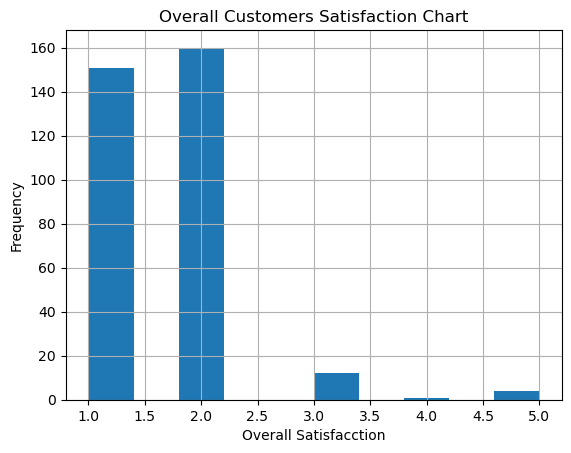

In [130]:
films.hist(column= 'Overall')
plt.xlabel("Overall Satisfacction")
plt.ylabel("Frequency")
plt.title("Overall Customers Satisfaction Chart")
plt.show()

In [ ]:
# Here we can Clearly saw that Overall level of customer's satisfaction is mostly 2 and 1
# that means, on a given scale(in the question)
# Customer's Overall Satisfaction is GOOD and EXCELLENT

In [131]:
print("Conclusion :")
print("Customer's Overall Satisfaction is GOOD and EXCELLENT")

Conclusion :
Customer's Overall Satisfaction is GOOD and EXCELLENT


##### 2. What factors are linked to satisfaction?

In [ ]:
# taking columns SINAGE, PARKING and CLEAN one by one with col Overall in order to getthe factors that are affecting Customer's Satisfaction

In [133]:
# Situation 1 : 
    #checkin link between col Overall and Sinage
    
#H0---> No relation between columns Overall and Sinage
#H1---> Relationship is present between columns Overall and Sinage

In [146]:
overall_and_sinage = pd.crosstab(index=films.Overall,columns=(films.Sinage))

In [147]:
# As these two are categorical variable, so using chi-square test
stats.chi2_contingency(overall_and_sinage)

Chi2ContingencyResult(statistic=124.81695331531306, pvalue=6.47639805161236e-19, dof=16, expected_freq=array([[5.18348624e+01, 7.11009174e+01, 2.20183486e+01, 2.75229358e+00,
        2.29357798e+00],
       [5.52905199e+01, 7.58409786e+01, 2.34862385e+01, 2.93577982e+00,
        2.44648318e+00],
       [4.14678899e+00, 5.68807339e+00, 1.76146789e+00, 2.20183486e-01,
        1.83486239e-01],
       [3.45565749e-01, 4.74006116e-01, 1.46788991e-01, 1.83486239e-02,
        1.52905199e-02],
       [1.38226300e+00, 1.89602446e+00, 5.87155963e-01, 7.33944954e-02,
        6.11620795e-02]]))

In [ ]:
# Insights
    #  # I got p-value smaller than 0.05 that means with 95% confidence, I reject the null hypothesis
# Conclusion
    # Relationship is Present between col Overall and Sinage

In [ ]:
# Situation 2 : 
    #checkin link between col Overall and Parkinng

#H0---->NO relation between Col Overall and Parking

#H1---->Relationship is Present between col Overall and Parking

In [144]:
overall_and_parking= pd.crosstab(index=films.Overall,columns=(films.Parking))

In [145]:
stats.chi2_contingency(overall_and_parking)

Chi2ContingencyResult(statistic=229.47943657632044, pvalue=8.162450437897989e-40, dof=16, expected_freq=array([[6.18776758e+01, 7.06513761e+01, 1.33914373e+01, 3.23241590e+00,
        1.84709480e+00],
       [6.51559633e+01, 7.43944954e+01, 1.41009174e+01, 3.40366972e+00,
        1.94495413e+00],
       [4.91743119e+00, 5.61467890e+00, 1.06422018e+00, 2.56880734e-01,
        1.46788991e-01],
       [4.09785933e-01, 4.67889908e-01, 8.86850153e-02, 2.14067278e-02,
        1.22324159e-02],
       [1.63914373e+00, 1.87155963e+00, 3.54740061e-01, 8.56269113e-02,
        4.89296636e-02]]))

In [148]:
stats.chi2_contingency(overall_and_parking)

Chi2ContingencyResult(statistic=229.47943657632044, pvalue=8.162450437897989e-40, dof=16, expected_freq=array([[6.18776758e+01, 7.06513761e+01, 1.33914373e+01, 3.23241590e+00,
        1.84709480e+00],
       [6.51559633e+01, 7.43944954e+01, 1.41009174e+01, 3.40366972e+00,
        1.94495413e+00],
       [4.91743119e+00, 5.61467890e+00, 1.06422018e+00, 2.56880734e-01,
        1.46788991e-01],
       [4.09785933e-01, 4.67889908e-01, 8.86850153e-02, 2.14067278e-02,
        1.22324159e-02],
       [1.63914373e+00, 1.87155963e+00, 3.54740061e-01, 8.56269113e-02,
        4.89296636e-02]]))

In [149]:
# Insights
    #  # I got p-value smaller than 0.05 that means with 95% confidence, I reject the null hypothesis
# Conclusion
    # Relationship is Present between col Overall and Parking

In [150]:
# Situation 3 : 
    #checkin link between col Overall and Clean

In [151]:
#H0---->No relation between col Overall and Clean
#H1---->Relationship is present between col Overall and Clean

In [152]:
# taking these two columns in a separate variable
overall_and_clean =pd.crosstab(index=films.Overall,columns=(films.Clean))

In [153]:
 stats.chi2_contingency(overall_and_clean)

Chi2ContingencyResult(statistic=125.17708834561675, pvalue=5.517448379868074e-19, dof=16, expected_freq=array([[6.64954128e+01, 7.01896024e+01, 1.10825688e+01, 2.30886850e+00,
        9.23547401e-01],
       [7.00183486e+01, 7.39082569e+01, 1.16697248e+01, 2.43119266e+00,
        9.72477064e-01],
       [5.28440367e+00, 5.57798165e+00, 8.80733945e-01, 1.83486239e-01,
        7.33944954e-02],
       [4.40366972e-01, 4.64831804e-01, 7.33944954e-02, 1.52905199e-02,
        6.11620795e-03],
       [1.76146789e+00, 1.85932722e+00, 2.93577982e-01, 6.11620795e-02,
        2.44648318e-02]]))

In [ ]:
# Insights
    #  # I got p-value smaller than 0.05 that means with 95% confidence, I reject the null hypothesis
# Conclusion
    # Relationship is Present between col Overall and Clean

In [154]:
print("Conclusion: ")
print("There is a significant correlation between the overall satisfaction level and various factors such as Sinage, Cleaniness and Parking and these factors are responsible to affect the Overall Satisfaction of the Customer")

Conclusion: 
There is a significant correlation between the overall satisfaction level and various factors such as Sinage, Cleaniness and Parking and these factors are responsible to affect the Overall Satisfaction of the Customer


##### 3.What is the demographic profile of Film on the Rocks patrons?

In [155]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,Female,Single,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,Female,Married,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,Male,Married,1.0,1.0,1.0,1.0,2.0,1.0,3


In [157]:
#Taking counts of Gender
films['Gender'].value_counts()

Gender
Female    213
Male      117
Name: count, dtype: int64

In [160]:
films.shape

(330, 11)

In [161]:
#Female Percentage
213/films.shape[0]*100

64.54545454545455

In [162]:
#Male Percentage
117/films.shape[0]*100

35.45454545454545

In [163]:
#Taking counts of Marital Status
films['Marital_Status'].value_counts()

Marital_Status
Single     228
Married    100
Name: count, dtype: int64

In [164]:
#Single Percentage
228/films.shape[0]*100

69.0909090909091

In [165]:
#Married Percentage
100/films.shape[0]*100

30.303030303030305

In [166]:
# Taking most likely age group
films.Age.value_counts()

Age
2.0    175
3.0    117
1.0     26
4.0     10
Name: count, dtype: int64

In [167]:
# Taking most likely Income group
films.Income.value_counts()

Income
1.0    142
3.0     90
2.0     82
Name: count, dtype: int64

In [168]:
print("         Demographic Profile of Film on the Rocks Patrons :")
print(" ")
print("There are Total of 213 (64.5%) Female Profiles on The Rock Patrons ")
print("There are Total of 117 (35.5%) Males Profile on The Rock Patrons")
print("There are Total of 228 (69.9%) Single Profiles on The Rock Patrons")
print("There are Total of 100 (30.1%) Married Profiles on The Rock Patrons")
print("There are More People from Age group 2 (13-30 years) on The Rock Patrons")
print("There are More People with Income group 1 (Less than $50,000) on The Rock Patrons")

         Demographic Profile of Film on the Rocks Patrons :
 
There are Total of 213 (64.5%) Female Profiles on The Rock Patrons 
There are Total of 117 (35.5%) Males Profile on The Rock Patrons
There are Total of 228 (69.9%) Single Profiles on The Rock Patrons
There are Total of 100 (30.1%) Married Profiles on The Rock Patrons
There are More People from Age group 2 (13-30 years) on The Rock Patrons
There are More People with Income group 1 (Less than $50,000) on The Rock Patrons


##### 4. In what media outlet(s) should the film series be advertised?

In [169]:
# As we have mentioned the Hear About range in the Data Available Column in Business Problem as : 
    #1 = television; 2 =newspaper; 3 = radio; 4 = website; 5 = word of mouth

In [170]:
films.Hear_About.value_counts()

Hear_About
5      226
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: count, dtype: int64

In [171]:
# And we have multiple instances where Hear_about value is given as (2,5),(3,4),(4,5)...etc
    # and many these values have 5 in it and also the maximum occurance out of these numbers is also 5
    # So, replacing (2,5),(3,4),(4,5)...etc these values with 5

In [172]:
films.Hear_About.replace({'1,5':'5','2,5':'5', '3,4':'5','3,5':'5', '4,5':'5','5,4':'5'}, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_13368\2404809543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  films.Hear_About.replace({'1,5':'5','2,5':'5', '3,4':'5','3,5':'5', '4,5':'5','5,4':'5'}, inplace=True)


In [173]:
films.Hear_About.value_counts()

Hear_About
5    234
4     41
1     22
3     14
2     12
Name: count, dtype: int64

In [174]:
films.Hear_About=films.Hear_About.astype("float")

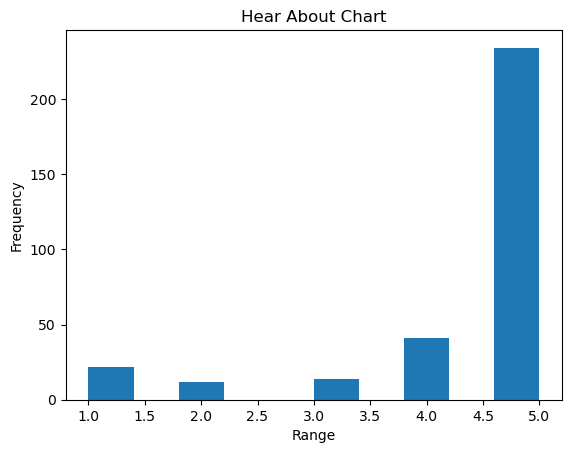

In [175]:
plt.hist(films.Hear_About)
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Hear About Chart')
plt.show()

In [177]:
# we have got the 5 (Word  of moth) with maximum frequency but it does not comes under media category
# So, taking the next category i.e, 4 (Website)  with second highest frequency and category 1 i.e, (Television) as the BEst media Outlet to advertise 

In [176]:
print("The Best Media Outlets to Advertise the film series should be WEBSITE and TELEVISION")

The Best Media Outlets to Advertise the film series should be WEBSITE and TELEVISION
